In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")

In [2]:
model="deepseek-r1-distill-llama-70b"

### Load the model

In [3]:
from langchain_groq import ChatGroq


In [4]:
llm=ChatGroq(model_name=model)

In [5]:
llm.invoke("hi")

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.092105386, 'prompt_time': 5.7909e-05, 'queue_time': 0.053231296, 'total_time': 0.092163295}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--07b15efa-89a5-4841-a1c5-5f0c6a18d535-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [6]:
print(llm.invoke("hi").content)

<think>

</think>

Hello! How can I assist you today? 😊


In [7]:
# import operator
# from typing import List
# from langgraph.graph.message import add_messages
# from pydantic import BaseModel , Field
# from typing import TypedDict, Annotated, Sequence
# from langchain_core.messages import BaseMessage
# from langchain_core.output_parsers import StrOutputParser
# from langchain_core.prompts import ChatPromptTemplate, PromptTemplate

from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [8]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}

In [154]:
# HumanMessage("hi how are you?")

In [155]:
# HumanMessage(["hi how are you?"])

### this code is only for the testing

In [9]:

state={"messages":["hi hello how are you?"]}
call_model(state)

{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.208632472, 'prompt_time': 0.000213146, 'queue_time': 0.052667989000000005, 'total_time': 0.208845618}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--04592678-127e-446e-8a54-ed4548dd50f8-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [ ]:
# from langchain_core.messages import AnyMessage
# # class MessagesState(TypedDict):
# #     messages: Annotated[list[AnyMessage], add_messages]


# class AgentState(TypedDict):
#     messages: Annotated[Sequence[BaseMessage], operator.add]

## Design a simple workflow without tool calling/

In [10]:
workflow=StateGraph(MessagesState)

In [11]:
workflow.add_node("mybot",call_model)

In [12]:
workflow.add_edge(START,"mybot")

In [13]:
workflow.add_edge("mybot",END)

In [14]:
app=workflow.compile()

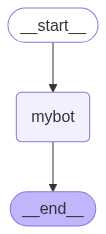

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
input={"messages":["hi hello how are you?"]}

In [17]:
app.invoke(input)

{'messages': [HumanMessage(content='hi hello how are you?', additional_kwargs={}, response_metadata={}, id='86678c64-842b-4f45-8974-32043114645a'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.202602115, 'prompt_time': 0.000210667, 'queue_time': 0.056612063000000004, 'total_time': 0.202812782}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--4dcea7ba-3ceb-464a-bac1-839a6977b653-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}

In [18]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from mybot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 9, 'total_tokens': 53, 'completion_time': 0.215421489, 'prompt_time': 0.000218917, 'queue_time': 0.056584193, 'total_time': 0.215640406}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--7f7c97e9-9242-4379-a1d7-b5ff902de852-0', usage_metadata={'input_tokens': 9, 'output_tokens': 44, 'total_tokens': 53})]}




### this is a workflow with tool calling

In [19]:
@tool
def search(query:str):
    """this is my custom tool for searching a weather"""
    if "delhi" in query.lower():
        return "the temp is 45 degree and sunny"
    return "the temp is 25 degree and cloudy"

## testing a tool

In [20]:
search.invoke("what is a tempurature in kashmir?")

'the temp is 25 degree and cloudy'

In [21]:
search.invoke("what is a tempurature in delhi?")

'the temp is 45 degree and sunny'

In [22]:
search

StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001E9245E6050>)

In [23]:
llm.invoke("what is a weather in delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a humid subtropical climate with the following seasons:\n\n- **Summer (March to June):** Extremely hot with temperatures often reaching 40°C (104°F) or more.\n- **Monsoon (July to September):** Hot and humid with significant rainfall.\n- **Winter (December to February):** Cool to cold with temperatures sometimes dropping to 5°C (41°F) or lower.\n\nFor the most current weather conditions in Delhi, I recommend checking a reliable weather service or app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 11, 'total_tokens': 138, 'completion_time': 0.461818182, 'prompt_time': 0.000339565, 'queue_time': 0.059857905, 'total_time': 0.462157747}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--0

### Binding a tool to the LLM

### Special Note: use some good for agentic workflow since opensource model might not give you the correct output

In [24]:
tools=[search]

In [25]:
llm_with_tool=llm.bind_tools(tools)

### testig my llm_with_tool

In [26]:
response=llm_with_tool.invoke("what is a weather is delhi?")

In [27]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qkfnprg1z', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 133, 'total_tokens': 245, 'completion_time': 0.510956004, 'prompt_time': 0.008588678, 'queue_time': 0.056135561, 'total_time': 0.519544682}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7fc7b9e4-e891-444a-a7ef-053997a7c8ac-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'qkfnprg1z', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 112, 'total_tokens': 245})

In [28]:
response.content

''

In [29]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'qkfnprg1z',
  'type': 'tool_call'}]

In [30]:
def call_model(state:MessagesState):
    question=state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

### Testing code

In [31]:
input={"messages":["what is a weather in delhi?"]}

In [32]:
response=call_model(input)

In [33]:
response["messages"][-1].content

''

In [34]:
response["messages"][-1].tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Delhi'},
  'id': 'vkkk4qwbg',
  'type': 'tool_call'}]

### here my router function

#### now whatever will come from call_model router funtion will redirect this to the appropriate tool

In [35]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return "tools"
    return END
    

In [36]:
tools

[StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001E9245E6050>)]

In [37]:

tool_node=ToolNode(tools)

In [38]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'search': StructuredTool(name='search', description='this is my custom tool for searching a weather', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001E9245E6050>)}, tool_to_state_args={'search': {}}, tool_to_store_arg={'search': None}, handle_tool_errors=True, messages_key='messages')

In [39]:
workflow2=StateGraph(MessagesState)

In [ ]:
workflow2.add_node("llmwithtool",call_model)

workflow2.add_node("mytools",tool_node)

workflow2.add_edge(START,"llmwithtool")

workflow2.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Node `mytools` already present.

In [43]:
app2=workflow2.compile()

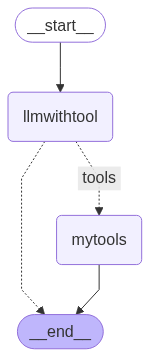

In [44]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [46]:
response=app2.invoke({"messages":["what is a weather in bengraluru?"]})

In [47]:
response["messages"][-1].content

'the temp is 25 degree and cloudy'

In [48]:
app2.invoke({"messages":["what is a weather in delhi?"]})

{'messages': [HumanMessage(content='what is a weather in delhi?', additional_kwargs={}, response_metadata={}, id='aeb03042-6a0c-46e3-ad44-86b5502abbfe'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'nb2tcwgxr', 'function': {'arguments': '{"query":"weather in Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 133, 'total_tokens': 255, 'completion_time': 0.509784945, 'prompt_time': 0.016021787, 'queue_time': 0.05305813300000001, 'total_time': 0.525806732}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--95370728-40cb-4c18-ac0e-9b763ddcbe8f-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in Delhi'}, 'id': 'nb2tcwgxr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 122, 'total_tokens': 255}),
  ToolMessage(content='the temp is 45 degree and sunny', name

### use good resoning based model

In [49]:
app2.invoke({"messages":["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='6306a281-22b9-44fd-93c8-34e7fb36c0d6'),
  AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 130, 'total_tokens': 272, 'completion_time': 0.528214036, 'prompt_time': 0.014748647, 'queue_time': 0.053397787, 'total_time': 0.542962683}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f2ee6ac5-b45a-4124-8e4c-b31ae4d05bfd-0', usage_metadata={'input_tokens': 130, 'output_tokens': 142, 'total_tokens': 272})]}

In [50]:
workflow2.add_edge("mytools","llmwithtool")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [51]:
app3=workflow2.compile()

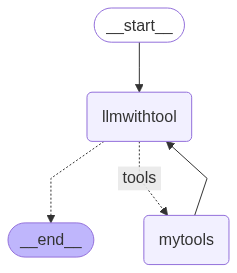

In [52]:
from IPython.display import Image, display
display(Image(app3.get_graph().draw_mermaid_png()))

In [53]:
for output in app3.stream({"messages":["what is a weather in new delhi?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from llmwithtool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'k70q5yg6z', 'function': {'arguments': '{"query":"weather in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 134, 'total_tokens': 233, 'completion_time': 0.452780084, 'prompt_time': 0.008574109, 'queue_time': 0.052149315, 'total_time': 0.461354193}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3f6252f0-9850-4da0-8bf5-aca0e3999852-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in New Delhi'}, 'id': 'k70q5yg6z', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 99, 'total_tokens': 233})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='029a2f4c-e3f9-415f-86af-928fdee1ed99',

In [54]:
"what is a weather in delhi can you tell me some good hotel for staying in north delhi"

'what is a weather in delhi can you tell me some good hotel for staying in north delhi'

In [55]:
from langgraph.checkpoint.memory import MemorySaver

In [56]:
memory=MemorySaver()

In [57]:
workflow3=StateGraph(MessagesState)

workflow3.add_node("llmwithtool",call_model)

workflow3.add_node("mytools",tool_node)

workflow3.add_edge(START,"llmwithtool")

workflow3.add_conditional_edges("llmwithtool",
                                router_function,
                                {"tools":"mytools",
                                 END:END})

workflow3.add_edge("mytools","llmwithtool")

In [58]:
app4=workflow3.compile(checkpointer=memory)

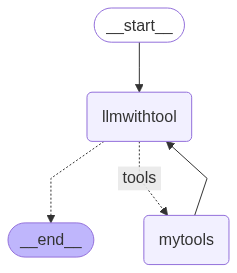

In [59]:
from IPython.display import Image, display
display(Image(app4.get_graph().draw_mermaid_png()))

In [60]:
config={"configurable": {"thread_id": "1"}}

In [61]:
events=app4.stream(
    {"messages":["what is a weather in new delhi?"]},config=config,stream_mode="values"
    )

In [62]:
for event in events:
    event["messages"][-1].pretty_print()
    

================================ Human Message =================================

what is a weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (r7j9ftvj4)
 Call ID: r7j9ftvj4
  Args:
    query: New Delhi weather
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

The weather in New Delhi is currently 45 degrees and sunny. It seems quite hot! Make sure to stay hydrated and wear light, breathable clothing if you're planning to be outdoors.


In [ ]:
events=app4.stream(
    {"messages":["what is a weather in indore?"]},config=config,stream_mode="values"
    )

In [64]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is a weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (h417zhpx9)
 Call ID: h417zhpx9
  Args:
    query: Indore weather
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (jmevy8w5f)
 Call ID: jmevy8w5f
  Args:
    query: Indore weather
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================
Tool Calls:
  search (ef2782av5)
 Call ID: ef2782av5
  Args:
    query: Indore weather
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
=

GraphRecursionError: Recursion limit of 25 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

In [65]:
config

{'configurable': {'thread_id': '1'}}

In [66]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T06:20:07.002141+00:00',
 'id': '1f048e79-dc45-6924-801e-b1236584e2cf',
 'channel_versions': {'__start__': '00000000000000000000000000000007.0.24415111456950656',
  'messages': '00000000000000000000000000000032.0.010309496663555406',
  'branch:to:llmwithtool': '00000000000000000000000000000032.0.17815128147541703',
  'branch:to:mytools': '00000000000000000000000000000032.0.34925484739987134'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000006.0.6219538624860984'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000031.0.3007382465139846'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000030.0.5640115552226159'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='7f8e1ec4-5f9d-4356-a045-70ac0a304b7c'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'r7j9ftvj4', 'functio

In [67]:
events=app4.stream(
    {"messages":["in which city the temp was 25 degree?"]},config=config,stream_mode="values"
    )

In [68]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

in which city the temp was 25 degree?
================================== Ai Message ==================================

The temperature was 25 degrees in **Indore**.


In [69]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-14T06:23:46.831930+00:00',
 'id': '1f048e82-0cbb-664c-8021-5d7a72adece6',
 'channel_versions': {'__start__': '00000000000000000000000000000034.0.023803232505675065',
  'messages': '00000000000000000000000000000035.0.4376194600932828',
  'branch:to:llmwithtool': '00000000000000000000000000000035.0.08714212289637824',
  'branch:to:mytools': '00000000000000000000000000000033.0.45976789541299645'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000033.0.3220800869652145'},
  'llmwithtool': {'branch:to:llmwithtool': '00000000000000000000000000000034.0.835340961680419'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000032.0.34925484739987134'}},
 'channel_values': {'messages': [HumanMessage(content='what is a weather in new delhi?', additional_kwargs={}, response_metadata={}, id='7f8e1ec4-5f9d-4356-a045-70ac0a304b7c'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'r7j9ftvj4', 'function